In [1]:
%matplotlib inline

In [2]:
import sys
import numpy as np
import os
import matplotlib.pyplot as plt


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [3]:
use_pretrained_model = False
pretrained_model_name = ""
context_frame_size = 19

In [4]:
train_data = np.load('workdir/train_tr_MFCC_0_D_A_norm_data_context_{}.npy'.format(str(context_frame_size)))
train_labels = np.load('workdir/train_tr_MFCC_0_D_A_norm_labels_context_{}.npy'.format(str(context_frame_size)))
val_data = np.load('workdir/train_va_MFCC_0_D_A_norm_data_context_{}.npy'.format(str(context_frame_size)))
val_labels = np.load('workdir/train_va_MFCC_0_D_A_norm_labels_context_{}.npy'.format(str(context_frame_size)))
test_data = np.load('workdir/test_MFCC_0_D_A_norm_data_context_{}.npy'.format(str(context_frame_size)))
test_labels = np.load('workdir/test_MFCC_0_D_A_norm_labels_context_{}.npy'.format(str(context_frame_size)))

print("Shape of training, validation and test data and corresponding labels")
for data, labels in [(train_data, train_labels), (val_data, val_labels), (test_data, test_labels)]:
    print(data.shape, labels.shape)

Shape of training, validation and test data and corresponding labels
(19, 3, 13, 1359661) (1359661,)
(19, 3, 13, 147731) (147731,)
(19, 3, 13, 1527014) (1527014,)


In [5]:
print(np.unique(train_labels))
print(len(np.unique(train_labels)))
nb_classes = len(np.unique(train_labels))
y_train_asd = np.array(train_labels) 
#y_test = np.array(y_test)
Y_train_asd = np_utils.to_categorical(y_train_asd, nb_classes)
#Y_test = np_utils.to_categorical(y_test, nb_classes)
print(Y_train_asd.shape)
print(train_labels[0])
print(Y_train_asd[0])

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.
  60.  61.  62.  63.]
64
(1359661, 64)
42.0
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


#### Change order of columns

In [6]:
print(train_data.shape)
X_train = np.transpose(train_data, (3, 0, 2, 1))
Y_train_num = train_labels
X_val = np.transpose(val_data, (3, 0, 2, 1))
Y_val_num = val_labels
X_test = np.transpose(test_data, (3, 0, 2, 1))
Y_test_num = test_labels

nb_classes = 64 #number of phonemes

Y_train = np_utils.to_categorical(Y_train_num, nb_classes)
Y_val = np_utils.to_categorical(Y_val_num, nb_classes)
Y_test = np_utils.to_categorical(Y_test_num, nb_classes)


print("Shape of re-ordered training, validation and test data and corresponding labels")
for data, labels in [(X_train, Y_train), (X_val, Y_val), (X_test, Y_test)]:
    print(data.shape, labels.shape)

(19, 3, 13, 1359661)
Shape of re-ordered training, validation and test data and corresponding labels
(1359661, 19, 13, 3) (1359661, 64)
(147731, 19, 13, 3) (147731, 64)
(1527014, 19, 13, 3) (1527014, 64)


In [7]:
if not use_pretrained_model:
    model = Sequential()
    model.add(Convolution2D(32, (3, 3), padding='same',
                            input_shape=(context_frame_size, 13, 3), activation='relu'))
    #model.add(Convolution2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
#    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))
    #model.add(Convolution2D(32, (3, 3), activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.1))

    model.add(Flatten())
    #model.add(Dense(28))
    #model.add(Activation('relu'))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0), metrics=['accuracy'])
    history = model.fit(X_train, Y_train, batch_size=64, epochs=100, verbose=2, validation_data=(X_val, Y_val))
    loss_and_metrics = model.evaluate(X_test, Y_test, verbose=0)
    print(loss_and_metrics)
    [print("Error rate:{}".format(1-loss_and_metrics[1]))]
    
else:
    from keras.models import load_model
    model = load_model('pretrained_model_name')

Train on 1359661 samples, validate on 147731 samples
Epoch 1/100
434s - loss: 0.9238 - acc: 0.7067 - val_loss: 0.6170 - val_acc: 0.7896
Epoch 2/100
114s - loss: 0.6060 - acc: 0.7908 - val_loss: 0.5560 - val_acc: 0.8058
Epoch 3/100
114s - loss: 0.5595 - acc: 0.8047 - val_loss: 0.5252 - val_acc: 0.8151
Epoch 4/100
114s - loss: 0.5357 - acc: 0.8118 - val_loss: 0.5170 - val_acc: 0.8183
Epoch 5/100
114s - loss: 0.5217 - acc: 0.8162 - val_loss: 0.5013 - val_acc: 0.8236
Epoch 6/100
114s - loss: 0.5122 - acc: 0.8187 - val_loss: 0.4997 - val_acc: 0.8224
Epoch 7/100
113s - loss: 0.5059 - acc: 0.8208 - val_loss: 0.4960 - val_acc: 0.8253
Epoch 8/100
114s - loss: 0.5011 - acc: 0.8225 - val_loss: 0.4921 - val_acc: 0.8272
Epoch 9/100
114s - loss: 0.4976 - acc: 0.8238 - val_loss: 0.4859 - val_acc: 0.8281
Epoch 10/100
114s - loss: 0.4949 - acc: 0.8244 - val_loss: 0.4832 - val_acc: 0.8293
Epoch 11/100
114s - loss: 0.4922 - acc: 0.8251 - val_loss: 0.4875 - val_acc: 0.8283
Epoch 12/100
114s - loss: 0.4906

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


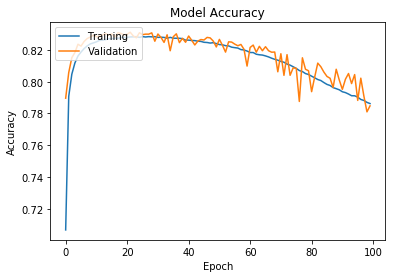

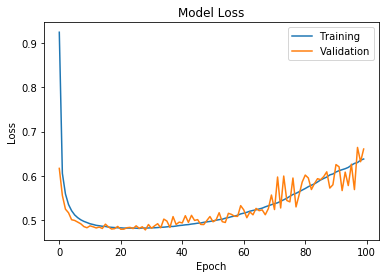

In [8]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [9]:
#model.save('models/context_19_conv32_3_3_padding_pool2_2_2_conv64_3_3_padding_pool_2_2dropout_0.1_64dense_80.93acc.h5')